Using TensorFlow backend.


(50000, 28, 28) (50000,)


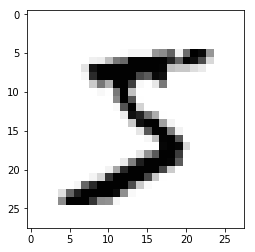

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
print(X_train.shape, y_train.shape)

(50000, 28, 28) (50000,)


In [3]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [4]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)
print(X_train_flatten.shape, X_test_flatten.shape)

(50000, 784) (10000, 784)


## Create Model

In [17]:
import tensorflow as tf

In [6]:
(m, n_x) = X_train_flatten.shape
n_y = 10 # 10 classes

# Create placeholders
X = tf.placeholder(tf.float32, shape=(None, n_x))
Y = tf.placeholder(tf.float32, shape=(None, n_y))

In [7]:
# Initialize parameters
W1 = tf.get_variable("W1",  [n_x, 128], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1",  [128], initializer=tf.zeros_initializer())
W2 = tf.get_variable("W2",  [128, 128], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2",  [128], initializer=tf.zeros_initializer())
W3 = tf.get_variable("W3", [128, n_y], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3",  [n_y], initializer=tf.zeros_initializer())

In [8]:
Z1 = tf.matmul(X, W1) + b1
A1 = tf.nn.relu(Z1)
Z2 = tf.matmul(A1, W2) + b2
A2 = tf.nn.relu(Z2)
Z3 = tf.matmul(A2, W3) + b3
A3 = tf.nn.sigmoid(Z3)

In [9]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=A3))

In [10]:
learning_rate = 0.0001
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()

In [12]:
# convert to one-hot encooding
import numpy as np
y_train = np.eye(n_y)[y_train]
y_test = np.eye(n_y)[y_test]

In [21]:
num_epochs = 150
batch_size = 500

Test cost after 10 epochs: 1.56282
Test cost after 20 epochs: 1.53007
Test cost after 30 epochs: 1.51585
Test cost after 40 epochs: 1.50688
Test cost after 50 epochs: 1.50024
Test cost after 60 epochs: 1.49514
Test cost after 70 epochs: 1.49097
Test cost after 80 epochs: 1.48747
Test cost after 90 epochs: 1.48457
Test cost after 100 epochs: 1.48217
Test cost after 110 epochs: 1.4802
Test cost after 120 epochs: 1.47845
Test cost after 130 epochs: 1.47691
Test cost after 140 epochs: 1.47557
Test cost after 150 epochs: 1.47448
Test cost after 160 epochs: 1.47361
Test cost after 170 epochs: 1.47279
Test cost after 180 epochs: 1.47213
Test cost after 190 epochs: 1.47154
Test cost after 200 epochs: 1.47107


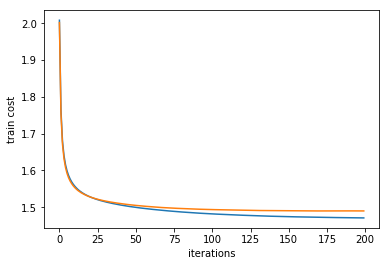

Train Accuracy: 0.98692
Test Accuracy: 0.9733


In [24]:
with tf.Session() as sess:
    sess.run(init)
    
    train_costs = []
    test_costs = []
    
    for epoch in range(num_epochs):
        for i in range(0, m, batch_size):
            sess.run(optimizer, feed_dict={X:X_train_flatten[i:i+batch_size], Y:y_train[i: i+batch_size]})
        train_costs.append(sess.run(cost, feed_dict={X:X_train_flatten, Y:y_train}))
        test_costs.append(sess.run(cost, feed_dict={X:X_test_flatten, Y:y_test}))
        if epoch%10 == 9:
            print("Test cost after " + str(epoch+1)+ " epochs: "+ str(train_costs[-1]))
    
    iterations = list(range(num_epochs))
    plt.plot(iterations, train_costs, label='Train')
    plt.plot(iterations, test_costs, label='Test')
    plt.ylabel('train cost')
    plt.xlabel('iterations')
    plt.show()
    
    # Calculate the correct predictions
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print ("Train Accuracy:", accuracy.eval({X: X_train_flatten, Y: y_train}))
    print ("Test Accuracy:", accuracy.eval({X: X_test_flatten, Y: y_test}))